## Projet de Session IFT712

EDELINE Maxime - edem2901  
L'HERMITE Valentin - lhev1601  
IVANOV Nicolas - ivan2302  

# Présentation

Dans ce fichier, il est possible de d'éxécuter nos algorithmes afin d'analyser les résultats. Nous avons implémentés nos algorithmes de façon à ce qu'une seule ligne se voit modifié si on souhaite utilisé un classifieur différent.

Nous allons travailler sur la base de données "Leaf Classification", fournie par Kaggle. On possède une base de données composé de 990 feuilles. Chaque feuille est caractérisé par 192 attributs. Le modèle doit être capable de déterminer l'espèce d'appartenance de la feuille parmi 99 espèces. Ainsi, l'objectif est d'entraîner le modèle pour qu'il détermine la classe d'appartenance d'une feuilles qu'on lui fourni parmi 99 classes.
Pour cette exercice, nous avons implémenté ces algorithmes:
* ADA Boost
* Perceptron
* Perceptron multicouches
* Random Forest
* Réseaux de neurone convolutifs
* Machines à vecteurs de support

  
  
Additionnellement, nous avons également implémentés trois algorithmes de recherches d'hyperparamètres, à savoir:
* Boostraping
* Sous-échantillonnage croisée
* Validation croisée

On commence par importer toutes les bibliothèques

In [6]:
#Importation des designs patterns strategy
from Modele.ClassifieurLineaire import *
from Modele.RechercheHyperparameter.RechercheHyperparameter import *

#Importation des algorithmes de classification
from Modele.AdaBoost import *
from Modele.Perceptron import *
from Modele.RandomForest import *
from Modele.RandomForestAvecACP import *
from Modele.SVM import *
from Modele.Reseaux_de_Neurone import *

#Importation des algorithmes de recherche d'hyperparamètres
from Modele.RechercheHyperparameter.SousEchantillonnageAleatoire import *
from Modele.RechercheHyperparameter.ValidationCroisee import *
from Modele.RechercheHyperparameter.BootstrapValidation import *

#Importation de la classe gestionnaire des données
from Modele.data import TrainData

#Importation d'une librairie de normalisation des données
from sklearn.preprocessing import StandardScaler

On va commencer par charger le jeu de données Leaf-Classification

In [7]:
#Répertoire du fichier train.csv
repertoire = "../leaf-classification/train.csv"
trainData = TrainData(repertoire)

# X = données
# T = étiquettes de classes associées aux données
X, T = trainData.data, trainData.leafClass

#Normalisation des données
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Séparation des données en groupe d'entrainement et groupe de test selon la proportion de la base de test
proportion_base_de_test = 0.2
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=proportion_base_de_test, random_state=42)

On choisi ensuite l'algorithme de classifieur à utilisé et l'lagorithme de recherche d'hyperparamètres

In [8]:
######################################################################################################
#####               Ligne à modifier pour changer l'algorithme de classification                  ####
######################################################################################################

#strategie_classifieur = AdaBoost(n_estimators=200, learning_rate=0.01, random_state=0, algorithm="SAMME.R", max_depth_tree_classifieur=3)
strategie_classifieur = RandomForest(n_estimators=123, criterion="gini")
#strategie_classifieur = Reseaux_Neurones((64,64)) 
#strategie_classifieur = Perceptron(learning_rate=0.112,max_iterations=500,penalty='l2')

#######################################################################################################
#####           Ligne à modifier pour changer l'algorithme de recherche d'hyperparamètres          ####
#######################################################################################################
strategie_recherche = ValidationCroisee(k = 10)
#strategie_recherche = SousEchantillonnage(10)
#strategie_recherche = BootstrapValidation(n_bootstrap=5,k_fold=5)


#Construction du classifieur
classifieur = ClassifieurLineaire(strategie_classifieur)

In [9]:

#Recherche d'Hyperparametre
recherche = RechercheHyperparameter(strategie_recherche)

#Recherche des hyperparamètres
recherche.recherche(classifieur, X, T)


########################## Début de la recherche - Validation Croisée ##########################
Il y aura  30  iterations
iterations  1  sur  30
precision amélioré:  0.9656565656565659 	avec ces paramètres:  (70, 'gini')
iterations  4  sur  30
precision amélioré:  0.9717171717171716 	avec ces paramètres:  (78, 'gini')


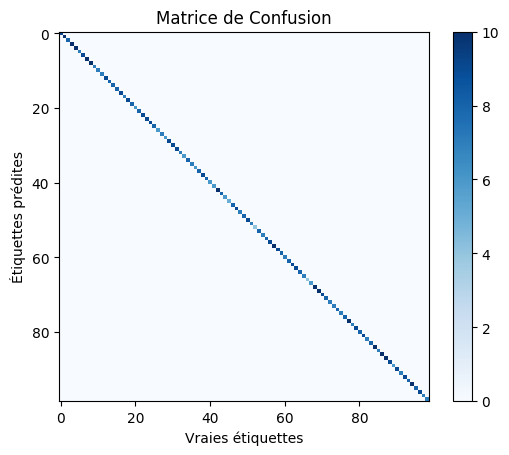

Base D'entrainement : 
precision: 1.0
rappel: 1.0
f1: 1.0


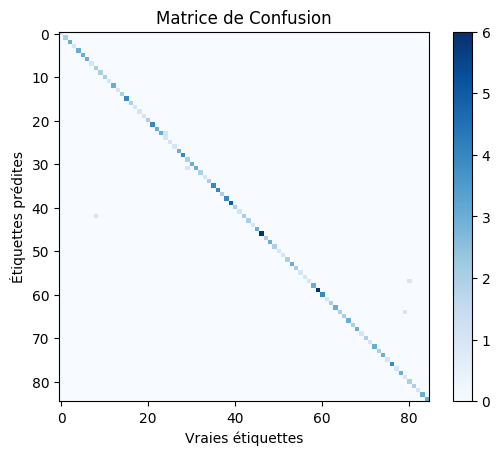


Base de Test : 
precision: 0.984848484848485
rappel: 0.9747474747474747
f1: 0.9753727753727753


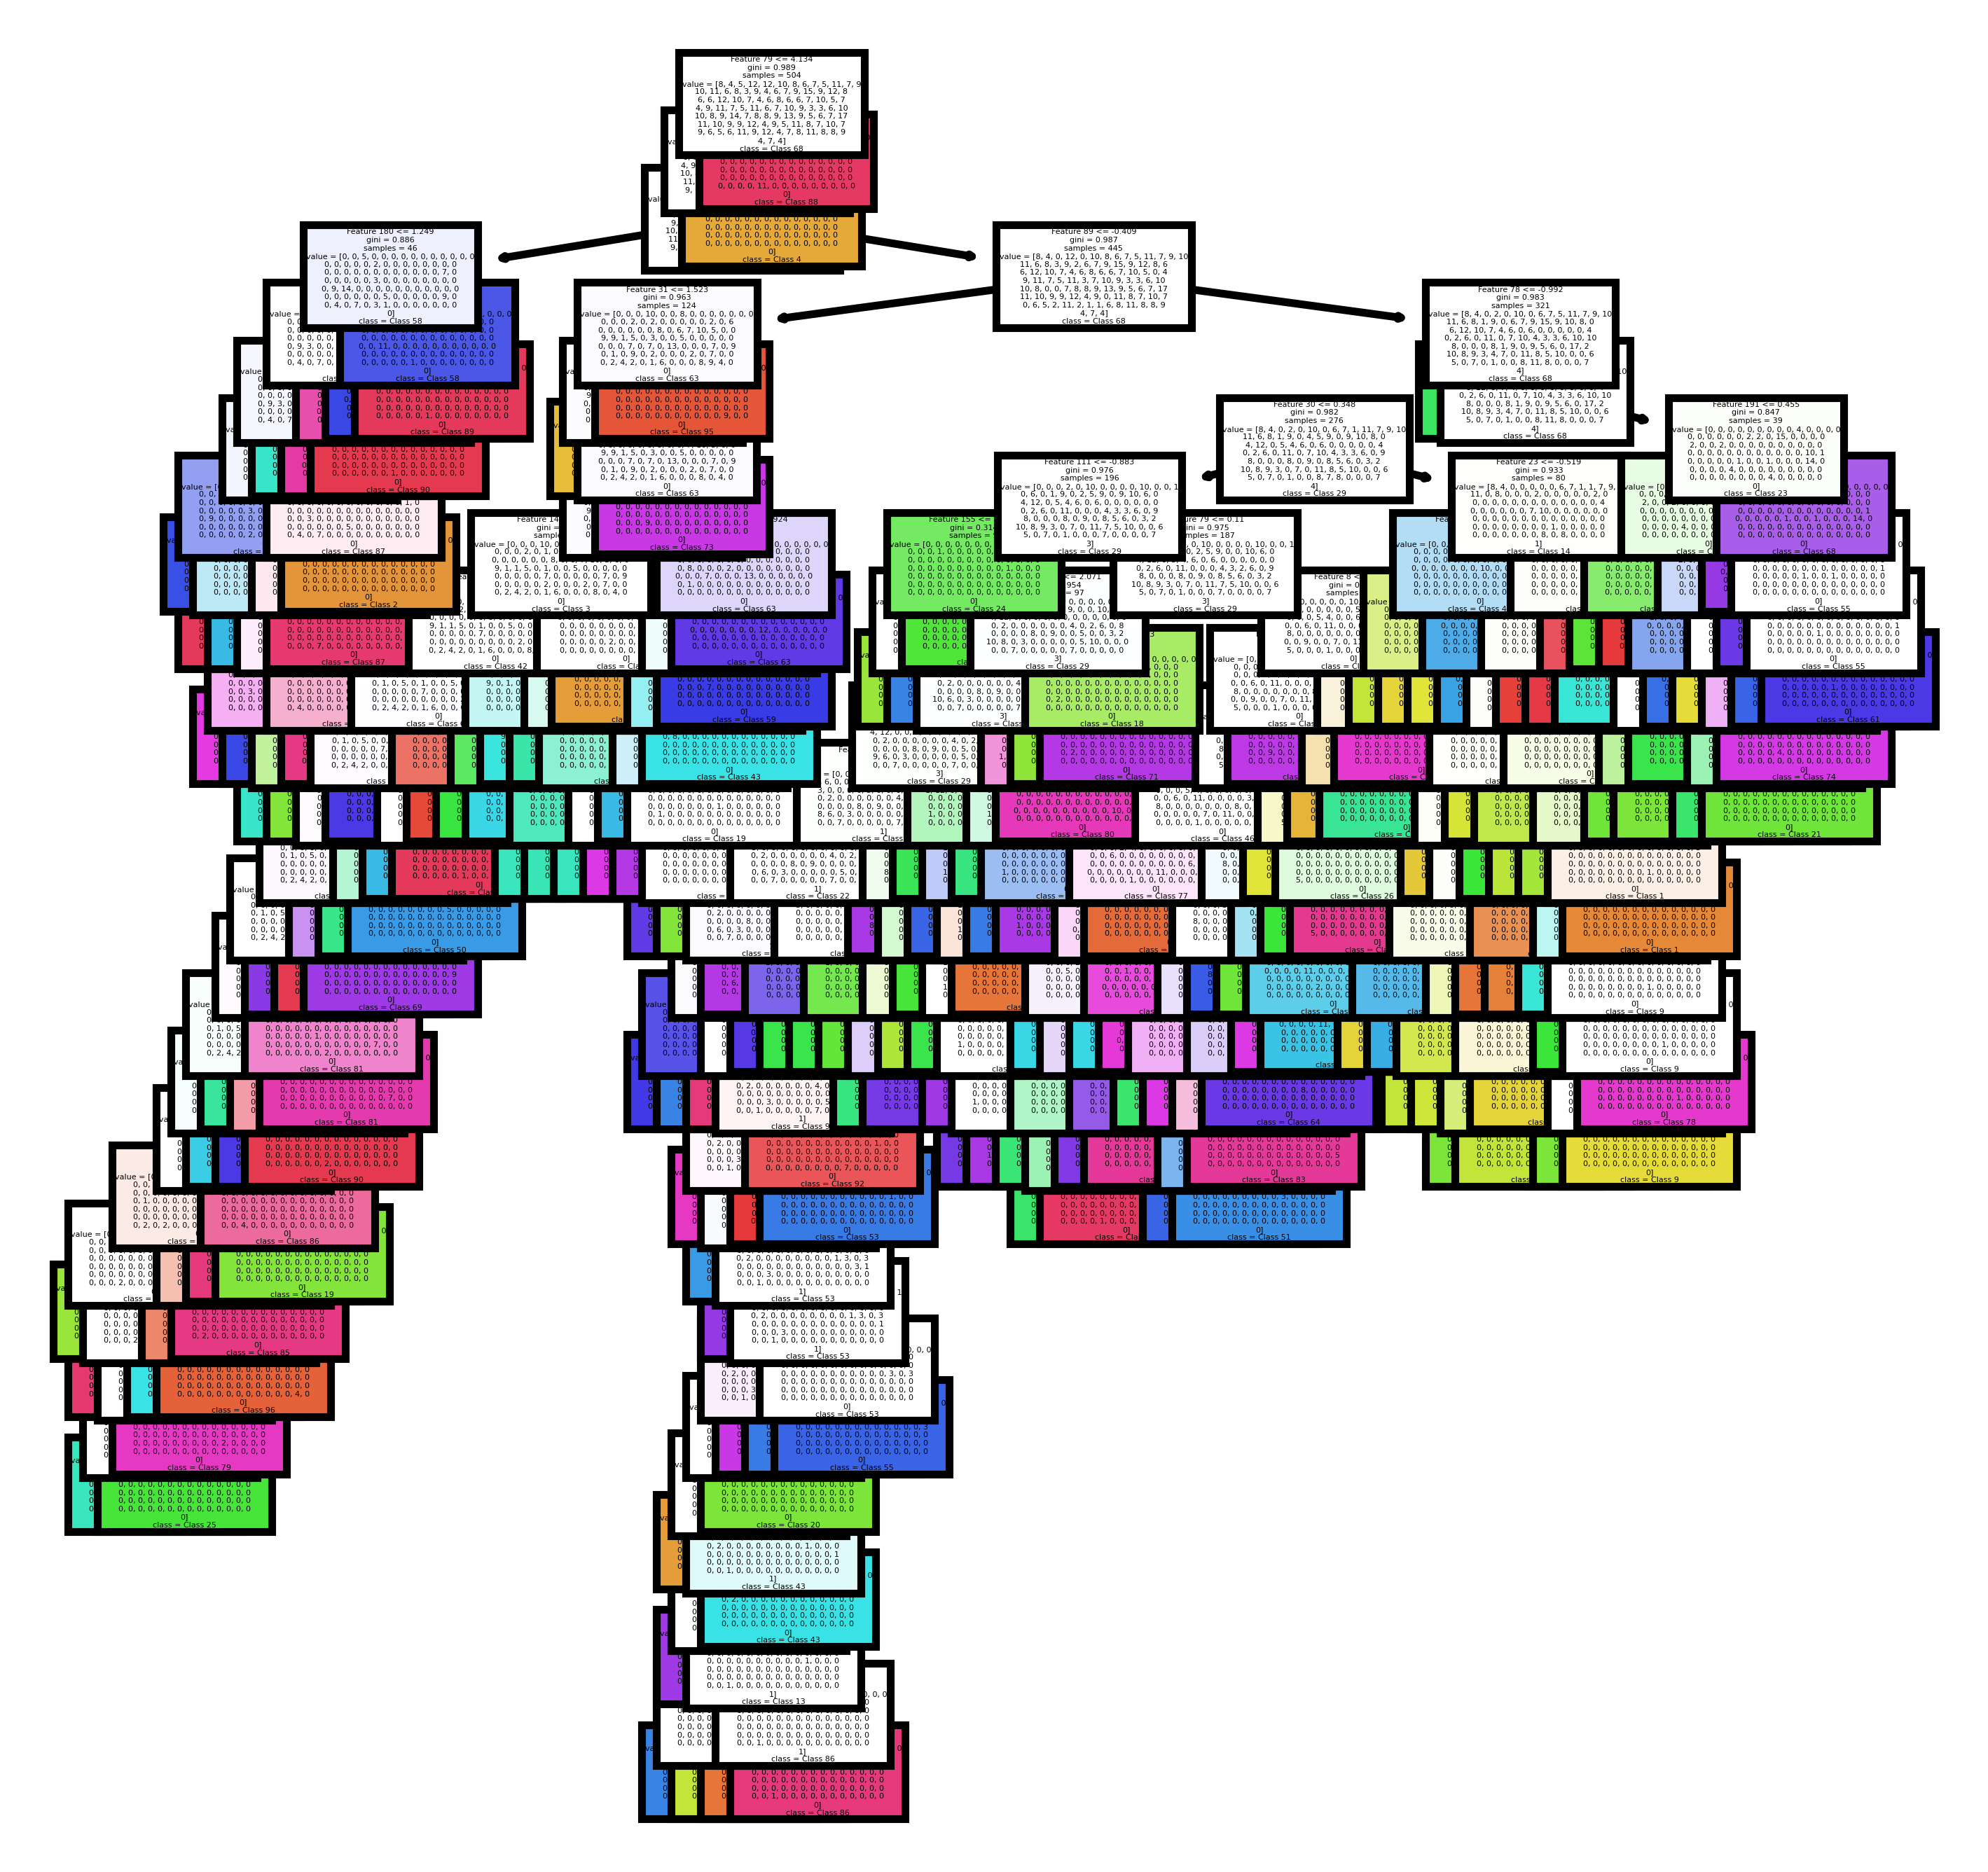

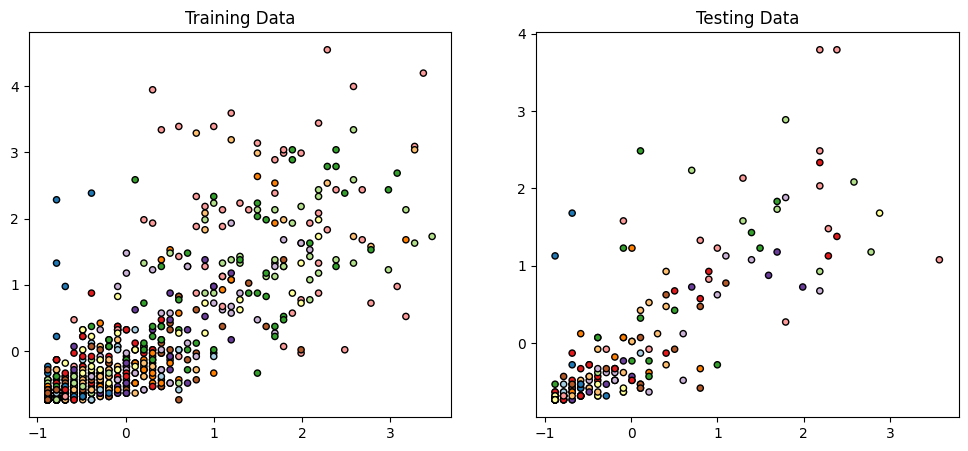

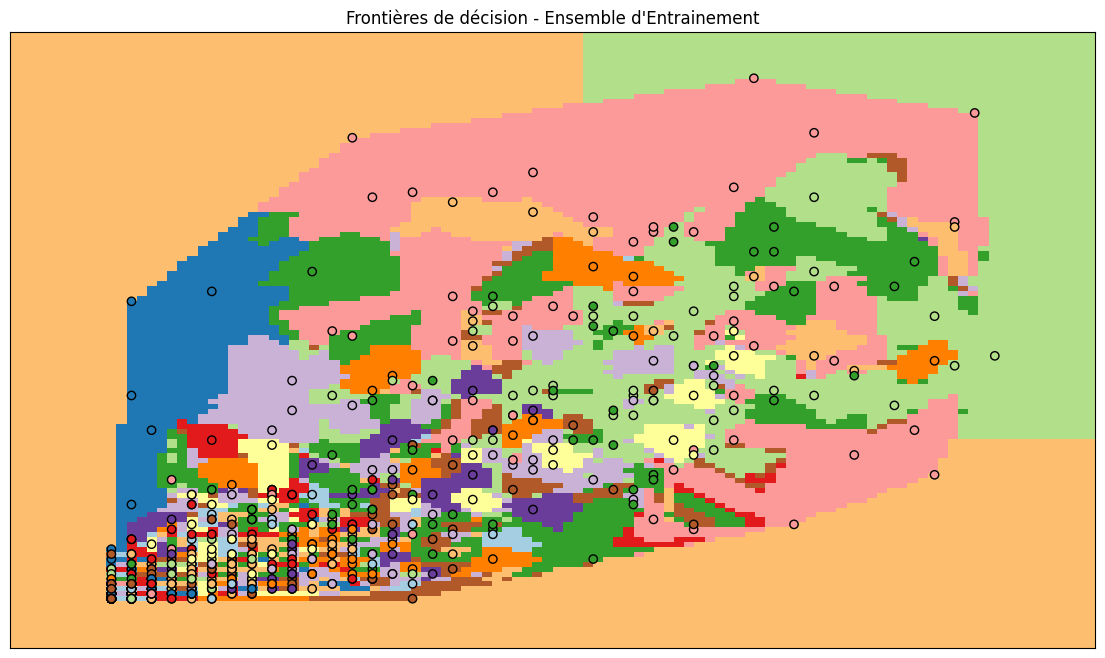

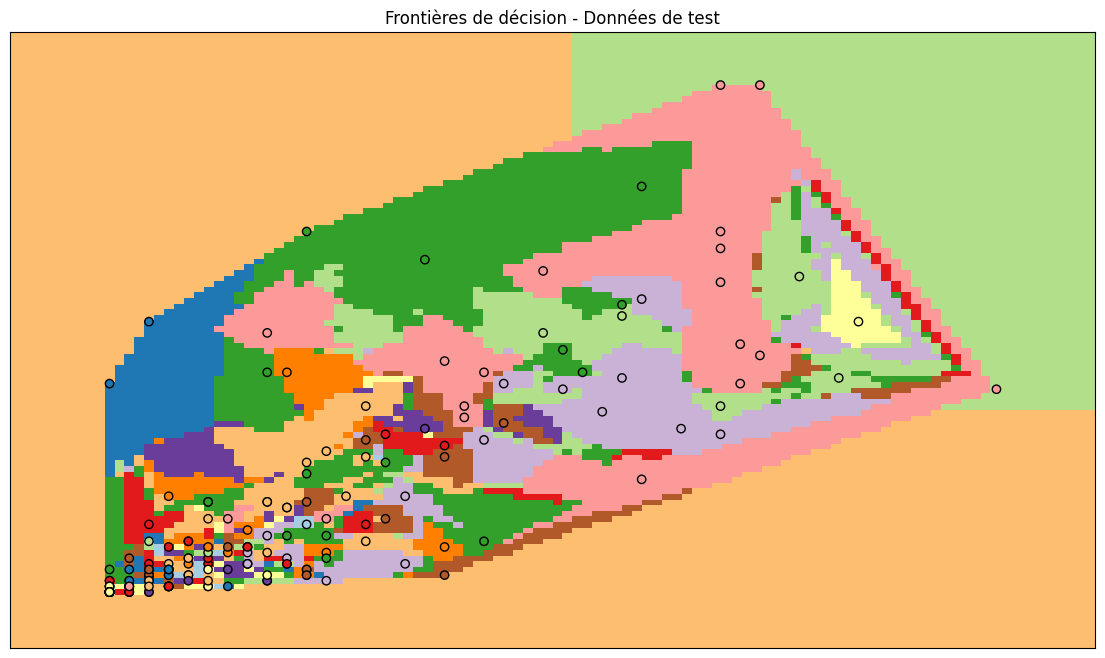

In [ ]:
#Entrainement du modèle
classifieur.entrainement(X_train, T_train)

#Prediction sur la base de test
predictions = classifieur.prediction(X_test) 

#Calcul de différentes metrique d'évaluation sur la base d'entrainement
precision, rappel, f1, _ = classifieur.evaluer(X_train, T_train)
print(f'Base D\'entrainement : ')
print(f'precision: {precision}')
print(f'rappel: {rappel}')
print(f'f1: {f1}')


#Calcul de différentes metrique d'évaluation sur la base de test
precision, rappel, f1, _ = classifieur.evaluer(X_test,T_test)
print(f'\nBase de Test : ')
print(f'precision: {precision}')
print(f'rappel: {rappel}')
print(f'f1: {f1}')

#Affichage des résultats dans un espace à deux dimensions
classifieur.afficher_donnees_et_modele(X_train, T_train, X_test, T_test)